In [1]:
import time
start_time = time.time()

In [2]:
import pandas as pd
import numpy as np
import matplotlib as pl
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score
from sklearn import metrics

import torch
import random
random.seed(0)
np.random.seed(0)

torch.manual_seed(0)
torch.cuda.manual_seed(0)

In [3]:
data = pd.read_csv("./churn_dataset.csv/churn_dataset.csv")

In [4]:
data.head()

,rev_Mean,mou_Mean,totmrc_Mean,da_Mean,ovrmou_Mean,ovrrev_Mean,vceovr_Mean,datovr_Mean,roam_Mean,change_mou,...,forgntvl,ethnic,kid0_2,kid3_5,kid6_10,kid11_15,kid16_17,creditcd,eqpdays,Customer_ID
0,23.9975,219.25,22.500,0.2475,0.00,0.0,0.0,0.0,0.0,-157.25,...,0.0,N,U,U,U,U,U,Y,361.0,1000001
1,57.4925,482.75,37.425,0.2475,22.75,9.1,9.1,0.0,0.0,532.25,...,0.0,Z,U,U,U,U,U,Y,240.0,1000002
2,16.9900,10.25,16.990,0.0000,0.00,0.0,0.0,0.0,0.0,-4.25,...,0.0,N,U,Y,U,U,U,Y,1504.0,1000003
3,38.0000,7.50,38.000,0.0000,0.00,0.0,0.0,0.0,0.0,-1.50,...,0.0,U,Y,U,U,U,U,Y,1812.0,1000004
4,55.2300,570.50,71.980,0.0000,0.00,0.0,0.0,0.0,0.0,38.50,...,0.0,I,U,U,U,U,U,Y,434.0,1000005


In [5]:
data.shape

(100000, 100)

In [6]:
data.dtypes.unique()

array([dtype('float64'), dtype('int64'), dtype('O')], dtype=object)

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 100 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   rev_Mean          99643 non-null   float64
 1   mou_Mean          99643 non-null   float64
 2   totmrc_Mean       99643 non-null   float64
 3   da_Mean           99643 non-null   float64
 4   ovrmou_Mean       99643 non-null   float64
 5   ovrrev_Mean       99643 non-null   float64
 6   vceovr_Mean       99643 non-null   float64
 7   datovr_Mean       99643 non-null   float64
 8   roam_Mean         99643 non-null   float64
 9   change_mou        99109 non-null   float64
 10  change_rev        99109 non-null   float64
 11  drop_vce_Mean     100000 non-null  float64
 12  drop_dat_Mean     100000 non-null  float64
 13  blck_vce_Mean     100000 non-null  float64
 14  blck_dat_Mean     100000 non-null  float64
 15  unan_vce_Mean     100000 non-null  float64
 16  unan_dat_Mean     10

# Посмотрим на целевую переменную

In [8]:
data.churn.value_counts()
# Примерно одинаковое количество элементов

0    50438
1    49562
Name: churn, dtype: int64

In [9]:
# All string columns
obj_col = list(data.select_dtypes(['object']).columns)
print(len(obj_col))
data[obj_col]

21


,new_cell,crclscod,asl_flag,prizm_social_one,area,dualband,refurb_new,hnd_webcap,ownrent,dwlltype,...,infobase,HHstatin,dwllsize,ethnic,kid0_2,kid3_5,kid6_10,kid11_15,kid16_17,creditcd
0,U,A,N,S,NORTHWEST/ROCKY MOUNTAIN AREA,Y,N,WCMB,O,S,...,M,C,A,N,U,U,U,U,U,Y
1,N,EA,N,U,CHICAGO AREA,N,N,WC,NaN,S,...,M,C,A,Z,U,U,U,U,U,Y
2,Y,C,N,S,GREAT LAKES AREA,N,N,NaN,O,S,...,M,C,A,N,U,Y,U,U,U,Y
3,Y,B,N,T,CHICAGO AREA,N,N,NaN,NaN,M,...,M,C,D,U,Y,U,U,U,U,Y
4,Y,A,N,U,NEW ENGLAND AREA,Y,N,WCMB,R,M,...,M,C,O,I,U,U,U,U,U,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,U,B,N,U,LOS ANGELES AREA,N,N,WC,O,S,...,M,NaN,A,S,U,U,U,Y,U,Y
99996,U,CY,Y,S,LOS ANGELES AREA,N,N,WC,O,S,...,M,I,A,N,U,U,Y,Y,Y,Y
99997,U,DA,N,U,SOUTHWEST AREA,Y,N,WCMB,NaN,NaN,...,M,NaN,NaN,U,Y,Y,U,U,U,N
99998,U,EA,N,U,SOUTHWEST AREA,Y,N,WCMB,NaN,NaN,...,NaN,NaN,NaN,S,U,U,U,U,U,N


# Find and count all NaN values

[357, 357, 357, 357, 357, 357, 357, 357, 357, 891, 891, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2839, 2839, 2839, 7388, 40, 1, 1, 847, 1, 1, 10189, 1732, 1732, 33706, 30190, 31909, 1732, 23019, 22079, 25436, 49366, 37923, 38308, 1732, 1732, 1732, 1732, 1732, 1732, 1732, 1732, 1, 0]


<BarContainer object of 100 artists>

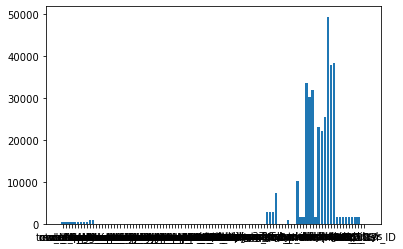

In [10]:
none_counts = []
for item in data.columns:
    none_counts.append(data[item].isna().sum())
print(none_counts)
plt.bar(data.columns, none_counts)

In [11]:
obj_col

['new_cell',
 'crclscod',
 'asl_flag',
 'prizm_social_one',
 'area',
 'dualband',
 'refurb_new',
 'hnd_webcap',
 'ownrent',
 'dwlltype',
 'marital',
 'infobase',
 'HHstatin',
 'dwllsize',
 'ethnic',
 'kid0_2',
 'kid3_5',
 'kid6_10',
 'kid11_15',
 'kid16_17',
 'creditcd']

# One hot encoding

In [12]:
data = pd.get_dummies(data)

In [13]:
data.shape

(100000, 232)

[357, 357, 357, 357, 357, 357, 357, 357, 357, 891, 891, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2839, 2839, 2839, 847, 1, 1, 1732, 1732, 30190, 23019, 25436, 49366, 1732, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


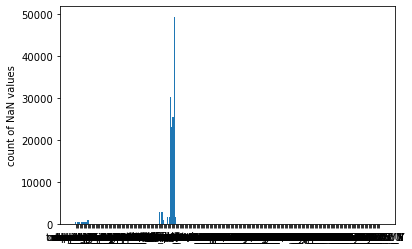

In [14]:
none_counts = []
for item in data.columns:
    none_counts.append(data[item].isna().sum())
print(none_counts)
plt.bar(data.columns, none_counts)
plt.ylabel('count of NaN values')
plt.show()

In [15]:
ind_of_max_none = none_counts.index(max(none_counts))
column_lots_of_none = data.columns[75]
print(data[column_lots_of_none].dtype)
data[column_lots_of_none].describe()

float64


count    50634.000000
mean         1.567563
std          0.625456
min          1.000000
25%          1.000000
50%          1.000000
75%          2.000000
max          3.000000
Name: numbcars, dtype: float64

In [16]:
data.iloc[:,:90].describe()

,rev_Mean,mou_Mean,totmrc_Mean,da_Mean,ovrmou_Mean,ovrrev_Mean,vceovr_Mean,datovr_Mean,roam_Mean,change_mou,...,new_cell_U,new_cell_Y,crclscod_A,crclscod_A2,crclscod_A3,crclscod_AA,crclscod_B,crclscod_B2,crclscod_BA,crclscod_C
count,99643.000000,99643.000000,99643.000000,99643.000000,99643.000000,99643.000000,99643.000000,99643.000000,99643.000000,99109.000000,...,100000.000000,100000.000000,100000.00000,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,58.719985,513.559937,46.179136,0.888828,41.072247,13.559560,13.295062,0.261318,1.286405,-13.933818,...,0.669140,0.193010,0.16996,0.00861,0.000030,0.365090,0.041100,0.001090,0.126670,0.014560
std,46.291677,525.168140,23.623489,2.177619,97.296150,30.500885,30.056089,3.126531,14.711374,276.087509,...,0.470525,0.394663,0.37560,0.09239,0.005477,0.481458,0.198523,0.032997,0.332605,0.119784
min,-6.167500,0.000000,-26.915000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-3875.000000,...,0.000000,0.000000,0.00000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,33.260000,150.750000,30.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-87.000000,...,0.000000,0.000000,0.00000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,48.195000,355.500000,44.990000,0.247500,2.750000,1.000000,0.682500,0.000000,0.000000,-6.250000,...,1.000000,0.000000,0.00000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,70.750000,703.000000,59.990000,0.990000,42.000000,14.437500,14.025000,0.000000,0.235000,63.000000,...,1.000000,0.000000,0.00000,0.00000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
max,3843.262500,12206.750000,409.990000,159.390000,4320.750000,1102.400000,896.087500,423.540000,3685.200000,31219.250000,...,1.000000,1.000000,1.00000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


# Lets check columns with large number of NaN

In [17]:
# Create a new column 'numbcars_NaN'
# If there is no value in the "numbcars" column, then = 0 and yes value = 1
column_max_none = data.columns[ind_of_max_none]
data[column_max_none+'_NaN'] = np.where(data[column_max_none].isnull(), 0,1)

In [18]:
data[[column_max_none,column_max_none+'_NaN' ]]

,numbcars,numbcars_NaN
0,3.0,1
1,1.0,1
2,2.0,1
3,1.0,1
4,1.0,1
...,...,...
99995,2.0,1
99996,2.0,1
99997,NaN,0
99998,NaN,0


In [19]:
data['numbcars_NaN'].value_counts()

1    50634
0    49366
Name: numbcars_NaN, dtype: int64

In [20]:
# Churn passengers by 'numbcars_NaN'
data.groupby(['numbcars_NaN']) ['churn'].value_counts(normalize=True)

numbcars_NaN  churn
0             1        0.502330
              0        0.497670
1             0        0.510922
              1        0.489078
Name: churn, dtype: float64

# Most likely there is no correlation between churn and numbercars

In [21]:
# drop numbcars and numbcars_NaN
data = data.drop(['numbcars_NaN','numbcars'],axis=1)

[357, 357, 357, 357, 357, 357, 357, 357, 357, 891, 891, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2839, 2839, 2839, 847, 1, 1, 1732, 1732, 30190, 23019, 25436, 1732, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


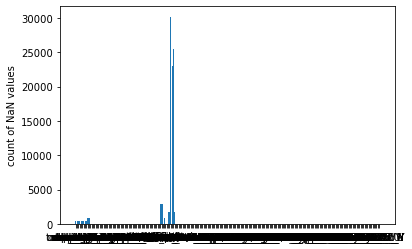

In [22]:
none_counts = []
for item in data.columns:
    none_counts.append(data[item].isna().sum())
print(none_counts)
plt.bar(data.columns, none_counts)
plt.ylabel('count of NaN values')
plt.show()

Lets look at NaN of other columns, where lots of missed values 

In [23]:
Nan_ind1 = none_counts.index(30190)
Nan_ind2 = none_counts.index(23019)
Nan_ind3 = none_counts.index(25436)

In [24]:
# create Nan columns
column_max_none1 = data.columns[Nan_ind1]
column_max_none2 = data.columns[Nan_ind2]
column_max_none3 = data.columns[Nan_ind3]
data[column_max_none1+'_NaN'] = np.where(data[column_max_none1].isnull(), 0,1)
data[column_max_none2+'_NaN'] = np.where(data[column_max_none2].isnull(), 0,1)
data[column_max_none3+'_NaN'] = np.where(data[column_max_none3].isnull(), 0,1)

In [25]:
print(data[column_max_none1+'_NaN'].value_counts())
print(data[column_max_none2+'_NaN'].value_counts())
print(data[column_max_none3+'_NaN'].value_counts())

1    69810
0    30190
Name: lor_NaN, dtype: int64
1    76981
0    23019
Name: adults_NaN, dtype: int64
1    74564
0    25436
Name: income_NaN, dtype: int64


In [26]:
# Churn passengers by 'numbcars_NaN'
print(data.groupby([column_max_none1+'_NaN']) ['churn'].value_counts(normalize=True))
print(data.groupby([column_max_none2+'_NaN']) ['churn'].value_counts(normalize=True))
print(data.groupby([column_max_none3+'_NaN']) ['churn'].value_counts(normalize=True))

lor_NaN  churn
0        1        0.513581
         0        0.486419
1        0        0.512147
         1        0.487853
Name: churn, dtype: float64
adults_NaN  churn
0           1        0.517181
            0        0.482819
1           0        0.510827
            1        0.489173
Name: churn, dtype: float64
income_NaN  churn
0           1        0.514350
            0        0.485650
1           0        0.510769
            1        0.489231
Name: churn, dtype: float64


In [27]:
data.shape

(100000, 234)

In [28]:
data.drop([column_max_none1+'_NaN',column_max_none2+'_NaN',column_max_none3+'_NaN',
          column_max_none1,column_max_none2,column_max_none3],axis=1, inplace=True)

In [29]:
data.shape

(100000, 228)

[357, 357, 357, 357, 357, 357, 357, 357, 357, 891, 891, 2839, 2839, 2839, 847, 1, 1, 1732, 1732, 1732, 1]


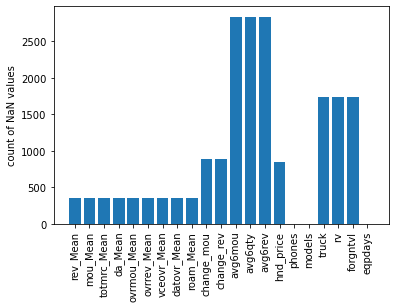

In [30]:
none_counts = []
names = []
for item in data.columns:
    tmp = data[item].isna().sum()
    if tmp > 0:
        names.append(item)
        none_counts.append(tmp)
print(none_counts)
plt.bar(names, none_counts)
plt.xticks(rotation=90)
plt.ylabel('count of NaN values')
plt.show()

In [31]:
data[names[:len(names)//2]].describe()

,rev_Mean,mou_Mean,totmrc_Mean,da_Mean,ovrmou_Mean,ovrrev_Mean,vceovr_Mean,datovr_Mean,roam_Mean,change_mou
count,99643.000000,99643.000000,99643.000000,99643.000000,99643.000000,99643.000000,99643.000000,99643.000000,99643.000000,99109.000000
mean,58.719985,513.559937,46.179136,0.888828,41.072247,13.559560,13.295062,0.261318,1.286405,-13.933818
std,46.291677,525.168140,23.623489,2.177619,97.296150,30.500885,30.056089,3.126531,14.711374,276.087509
min,-6.167500,0.000000,-26.915000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-3875.000000
25%,33.260000,150.750000,30.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-87.000000
50%,48.195000,355.500000,44.990000,0.247500,2.750000,1.000000,0.682500,0.000000,0.000000,-6.250000
75%,70.750000,703.000000,59.990000,0.990000,42.000000,14.437500,14.025000,0.000000,0.235000,63.000000
max,3843.262500,12206.750000,409.990000,159.390000,4320.750000,1102.400000,896.087500,423.540000,3685.200000,31219.250000


In [32]:
data[names[len(names)//2:]].describe()

,change_rev,avg6mou,avg6qty,avg6rev,hnd_price,phones,models,truck,rv,forgntvl,eqpdays
count,99109.000000,97161.000000,97161.000000,97161.000000,99153.000000,99999.000000,99999.000000,98268.000000,98268.000000,98268.000000,99999.000000
mean,-1.021067,509.634576,178.365157,58.683618,101.875763,1.787118,1.545825,0.188820,0.082580,0.057974,391.932309
std,50.363209,496.663453,182.724565,40.758577,61.005671,1.313977,0.898395,0.391368,0.275248,0.233696,256.482193
min,-1107.740000,0.000000,0.000000,-2.000000,9.989998,1.000000,1.000000,0.000000,0.000000,0.000000,-5.000000
25%,-7.365000,163.000000,59.000000,34.000000,29.989990,1.000000,1.000000,0.000000,0.000000,0.000000,212.000000
50%,-0.315000,363.000000,127.000000,50.000000,99.989990,1.000000,1.000000,0.000000,0.000000,0.000000,342.000000
75%,1.642500,698.000000,237.000000,71.000000,149.989990,2.000000,2.000000,0.000000,0.000000,0.000000,530.000000
max,9963.657500,7217.000000,3256.000000,866.000000,499.989990,28.000000,16.000000,1.000000,1.000000,1.000000,1823.000000


# Fill Nans for not categorial features

/home/alex/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/home/alex/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='datovr_Mean'>

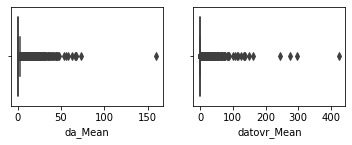

In [33]:
plt.subplot(2,2,1)
sns.boxplot(data.da_Mean)

plt.subplot(2,2,2)
sns.boxplot(data.datovr_Mean)

In [34]:
# data.datovr_Mean.unique()
print(data.models.unique())
print(data.phones.unique())
print(data.truck.unique())
print(data.rv.unique())
print(data.forgntvl.unique())

[ 2.  6.  1.  4.  3.  5.  7.  9. 10.  8. 11. 15. 14. nan 16.]
[ 2.  7.  1.  6.  9.  4.  3. 10.  5. 13.  8. 18. 12. 11. 24. 15. 14. 17.
 16. 19. 22. 21. 20. nan 28.]
[ 0.  1. nan]
[ 0.  1. nan]
[ 0.  1. nan]


In [35]:
ind_phones = names.index('phones')
ind_forgntvl = names.index('forgntvl')

In [36]:
non_categorial_names = names[:ind_phones]+names[ind_forgntvl+1:]
print(len(non_categorial_names))

16


In [37]:
for item in non_categorial_names:
    data[item] = data[item].fillna(data[item].mean())

In [38]:
data

,rev_Mean,mou_Mean,totmrc_Mean,da_Mean,ovrmou_Mean,ovrrev_Mean,vceovr_Mean,datovr_Mean,roam_Mean,change_mou,...,kid3_5_U,kid3_5_Y,kid6_10_U,kid6_10_Y,kid11_15_U,kid11_15_Y,kid16_17_U,kid16_17_Y,creditcd_N,creditcd_Y
0,23.997500,219.250000,22.500000,0.247500,0.000000,0.00000,0.000000,0.000000,0.000000,-157.250000,...,1,0,1,0,1,0,1,0,0,1
1,57.492500,482.750000,37.425000,0.247500,22.750000,9.10000,9.100000,0.000000,0.000000,532.250000,...,1,0,1,0,1,0,1,0,0,1
2,16.990000,10.250000,16.990000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,-4.250000,...,0,1,1,0,1,0,1,0,0,1
3,38.000000,7.500000,38.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,-1.500000,...,1,0,1,0,1,0,1,0,0,1
4,55.230000,570.500000,71.980000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,38.500000,...,1,0,1,0,1,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,58.719985,513.559937,46.179136,0.888828,41.072247,13.55956,13.295062,0.261318,1.286405,-13.933818,...,1,0,1,0,0,1,1,0,0,1
99996,58.719985,513.559937,46.179136,0.888828,41.072247,13.55956,13.295062,0.261318,1.286405,-13.933818,...,1,0,0,1,0,1,0,1,0,1
99997,58.719985,513.559937,46.179136,0.888828,41.072247,13.55956,13.295062,0.261318,1.286405,-13.933818,...,0,1,1,0,1,0,1,0,1,0
99998,58.719985,513.559937,46.179136,0.888828,41.072247,13.55956,13.295062,0.261318,1.286405,-13.933818,...,1,0,1,0,1,0,1,0,1,0


[1, 1, 1732, 1732, 1732]


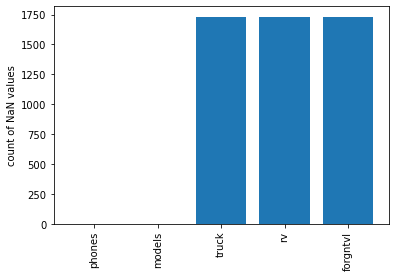

In [39]:
none_counts = []
names = []
for item in data.columns:
    tmp = data[item].isna().sum()
    if tmp > 0:
        names.append(item)
        none_counts.append(tmp)
print(none_counts)
plt.bar(names, none_counts)
plt.xticks(rotation=90)
plt.ylabel('count of NaN values')
plt.show()

[ 2.  7.  1.  6.  9.  4.  3. 10.  5. 13.  8. 18. 12. 11. 24. 15. 14. 17.
 16. 19. 22. 21. 20. nan 28.] 25


/home/alex/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='phones', ylabel='count'>

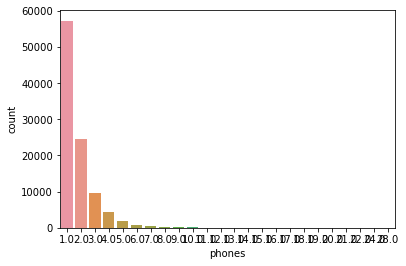

In [40]:
#fill NaN into categorial features
print(data.phones.unique(), len(data.phones.unique()))
sns.countplot(data.phones)

[ 2.  6.  1.  4.  3.  5.  7.  9. 10.  8. 11. 15. 14. nan 16.] 15


/home/alex/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='models', ylabel='count'>

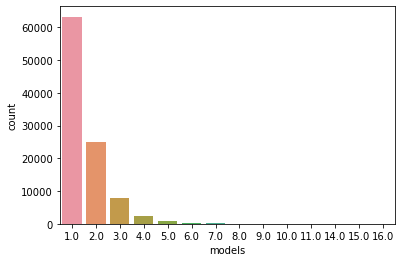

In [41]:
#fill NaN into categorial features
print(data.models.unique(), len(data.models.unique()))
sns.countplot(data.models)

In [42]:
data.phones = data.phones.fillna(1)
data.models = data.models.fillna(1)

/home/alex/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='truck', ylabel='count'>

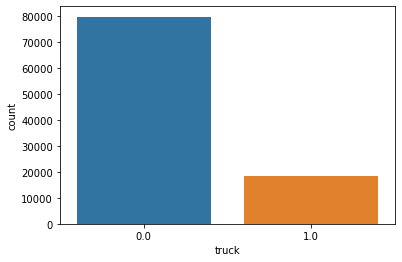

In [43]:
sns.countplot(data.truck)

In [44]:
print(data[data.truck == 0].shape)
print(data[data.truck == 1].shape)

(79713, 228)
(18555, 228)


In [45]:
print(data[data.rv == 0].shape)
print(data[data.rv == 1].shape)

(90153, 228)
(8115, 228)


In [46]:
print(data[data.forgntvl == 0].shape)
print(data[data.forgntvl == 1].shape)

(92571, 228)
(5697, 228)


In [47]:
print(data.groupby(['truck']) ['churn'].value_counts(normalize=True))
print(data.groupby(['forgntvl']) ['churn'].value_counts(normalize=True))
print(data.groupby(['rv'])['churn'].value_counts(normalize=True))

truck  churn
0.0    0        0.503092
       1        0.496908
1.0    0        0.508327
       1        0.491673
Name: churn, dtype: float64
forgntvl  churn
0.0       0        0.503462
          1        0.496538
1.0       0        0.514130
          1        0.485870
Name: churn, dtype: float64
rv   churn
0.0  0        0.504154
     1        0.495846
1.0  0        0.503266
     1        0.496734
Name: churn, dtype: float64


In [48]:
# Most likely there is no correlation between truck or forgntvl or rv and churn
# Drop them
data.drop(['truck','forgntvl', 'rv'], axis=1, inplace=True)

# Detect and exclude outliers

In [49]:
clear = data
for col in data.columns:
    q_hi = data[col].mean() + 7*data[col].std()
    if data[col].mean() > 1 and data[col].std()> 7:
        clear = clear[clear[col] < q_hi]

In [50]:
data.shape

(100000, 225)

In [51]:
clear.shape

(97279, 225)

In [52]:
clear.describe()


,rev_Mean,mou_Mean,totmrc_Mean,da_Mean,ovrmou_Mean,ovrrev_Mean,vceovr_Mean,datovr_Mean,roam_Mean,change_mou,...,kid3_5_U,kid3_5_Y,kid6_10_U,kid6_10_Y,kid11_15_U,kid11_15_Y,kid16_17_U,kid16_17_Y,creditcd_N,creditcd_Y
count,97279.000000,97279.000000,97279.000000,97279.000000,97279.000000,97279.000000,97279.000000,97279.000000,97279.000000,97279.000000,...,97279.000000,97279.000000,97279.000000,97279.000000,97279.000000,97279.000000,97279.000000,97279.000000,97279.000000,97279.000000
mean,55.667782,475.432209,45.216378,0.822810,35.226531,11.890021,11.686054,0.200873,1.050660,-11.397028,...,0.935700,0.047246,0.901767,0.081179,0.894427,0.088519,0.882883,0.100063,0.307034,0.675912
std,35.633531,449.283555,21.887213,1.870021,70.653566,23.522208,23.367976,1.630087,4.634164,231.959658,...,0.245287,0.212165,0.297631,0.273111,0.307291,0.284049,0.321561,0.300085,0.461266,0.468036
min,-6.167500,0.000000,-26.915000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-2481.750000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,33.062500,146.750000,30.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-82.750000,...,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000
50%,47.217500,345.000000,44.990000,0.247500,2.333333,0.875000,0.500000,0.000000,0.000000,-6.750000,...,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000
75%,67.955000,664.000000,59.662500,0.742500,39.500000,13.559560,13.250000,0.000000,0.235000,60.250000,...,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000
max,380.140000,3901.000000,210.392500,62.122500,715.500000,224.612500,222.775000,74.490000,103.927500,2780.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


# Train test split and StandardScale

In [53]:
X_train, X_test, y_train, y_test = train_test_split(clear.drop(['churn'],axis=1), 
                                                   clear.churn, random_state=1)

d_X_train, d_X_test, d_y_train, d_y_test = train_test_split(data.drop(['churn'],axis=1), 
                                                   data.churn, random_state=1)

In [54]:
print(X_train.shape)
print(X_test.shape)

(72959, 224)
(24320, 224)


In [55]:
scaler = StandardScaler()
scaler.fit(X_train)

StandardScaler()

In [56]:
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [57]:
X_train_scaled

array([[-0.65624094, -0.78890436, -0.23840178, ..., -0.33333587,
        -0.66641095,  0.69294213],
       [-0.12476652,  0.22367805,  1.13372467, ..., -0.33333587,
        -0.66641095,  0.69294213],
       [ 0.70652118,  0.79792033,  0.67634919, ..., -0.33333587,
         1.50057558, -1.44312196],
       ...,
       [ 0.19061237,  2.23269057,  0.67634919, ..., -0.33333587,
        -0.66641095,  0.69294213],
       [-0.72011603, -0.70257307, -0.69531988, ..., -0.33333587,
        -0.66641095,  0.69294213],
       [-0.53150571,  0.95220269, -0.00971404, ..., -0.33333587,
        -0.66641095,  0.69294213]])

# Linear models

In [58]:
# Lasso
regres_l1_low_C = LogisticRegression(penalty='none', C=0.01)
regres_l1_avg_C = LogisticRegression(penalty='none', C=1.0)
regres_l1_high_C = LogisticRegression(penalty='none', C=100)
# Ridge
regres_l2_low_C = LogisticRegression(penalty='l2', C=0.01)
regres_l2_avg_C = LogisticRegression(penalty='l2', C=1.0)
regres_l2_high_C = LogisticRegression(penalty='l2', C=10)
# SVC
svc_low_C = LinearSVC(C=0.01)
svc_avg_C = LinearSVC(C=1.0)
svc_high_C = LinearSVC(C=10)

# Fit Linear models

In [59]:
import warnings 
warnings.filterwarnings("ignore")

regres_l1_low_C.fit(X_train_scaled,y_train)
regres_l1_avg_C.fit(X_train_scaled,y_train)
regres_l1_high_C.fit(X_train_scaled,y_train)

regres_l2_low_C.fit(X_train_scaled,y_train)
regres_l2_avg_C.fit(X_train_scaled,y_train)
regres_l2_high_C.fit(X_train_scaled,y_train)

svc_low_C.fit(X_train_scaled,y_train)
svc_avg_C.fit(X_train_scaled,y_train)
svc_high_C.fit(X_train_scaled,y_train)

LinearSVC(C=10)

# Check accuracy and overfitting
### Mostly, I will use only accuracy, because number of "1" and "0" in churn is equal

train accuracy  0.6009813730999602
test accuracy  0.5912006578947369


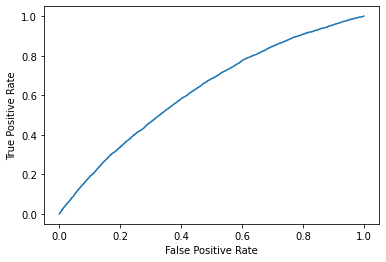

In [60]:
print('train accuracy ', regres_l1_low_C.score(X_train_scaled,y_train))
print("test accuracy ", regres_l1_low_C.score(X_test_scaled,y_test))
y_pred_proba = regres_l1_low_C.predict_proba(X_test_scaled)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)

#create ROC curve
plt.plot(fpr,tpr)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [61]:
print('train accuracy ', regres_l1_avg_C.score(X_train_scaled,y_train))
print("test accuracy ", regres_l1_avg_C.score(X_test_scaled,y_test))

train accuracy  0.6009813730999602
test accuracy  0.5912006578947369


In [62]:
print('train accuracy ', regres_l1_high_C.score(X_train_scaled,y_train))
print("test accuracy ", regres_l1_high_C.score(X_test_scaled,y_test))

train accuracy  0.6009813730999602
test accuracy  0.5912006578947369


In [63]:
print('train accuracy ', regres_l2_low_C.score(X_train_scaled,y_train))
print("test accuracy ", regres_l2_low_C.score(X_test_scaled,y_test))

train accuracy  0.6001315807508326
test accuracy  0.5904605263157895


In [64]:
print('train accuracy ', regres_l2_avg_C.score(X_train_scaled,y_train))
print("test accuracy ", regres_l2_avg_C.score(X_test_scaled,y_test))

train accuracy  0.6008717224742663
test accuracy  0.5910361842105263


train accuracy  0.6009676667717485
test accuracy  0.5915296052631579


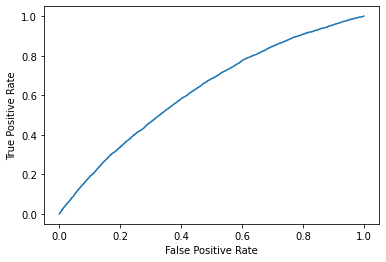

In [65]:
print('train accuracy ', regres_l2_high_C.score(X_train_scaled,y_train))
print("test accuracy ", regres_l2_high_C.score(X_test_scaled,y_test))
y_pred_proba = regres_l1_low_C.predict_proba(X_test_scaled)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)

#create ROC curve
plt.plot(fpr,tpr)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [66]:
print('train accuracy ', svc_low_C.score(X_train_scaled,y_train))
print("test accuracy ", svc_low_C.score(X_test_scaled,y_test))

train accuracy  0.6004879452843378
test accuracy  0.5909539473684211


In [67]:
print('train accuracy ', svc_high_C.score(X_train_scaled,y_train))
print("test accuracy ", svc_high_C.score(X_test_scaled,y_test))

train accuracy  0.5371784152743322
test accuracy  0.5357319078947368


# As we can see Linear models can't predict "churn". Let's try ensembles

In [68]:
# fit with RandomizedSearchCV, just because it faster
param = {'max_depth': range(10,150, 20), 
         'min_samples_split':range(10, 200, 20),
         'min_samples_leaf': range(2, 300, 50),
         'max_leaf_nodes': range(2,20,5)
        }

foresr_rand_CV = RandomizedSearchCV(
    estimator=RandomForestClassifier(n_jobs=-1),
param_distributions=param
)
# fit
foresr_rand_CV.fit(X_train_scaled, y_train)

RandomizedSearchCV(estimator=RandomForestClassifier(n_jobs=-1),
                   param_distributions={'max_depth': range(10, 150, 20),
                                        'max_leaf_nodes': range(2, 20, 5),
                                        'min_samples_leaf': range(2, 300, 50),
                                        'min_samples_split': range(10, 200, 20)})

In [69]:
# Score best estimator
best_forest = foresr_rand_CV.best_estimator_
# pd.DataFrame(best_forest.feature_importances_).plot.bar()
# plt.show()
print('train accuracy: ', best_forest.score(X_train_scaled, y_train))
print("test accuracy: ",best_forest.score(X_test_scaled, y_test))

train accuracy:  0.6032977425677435
test accuracy:  0.5983552631578948


In [70]:
# Gradient descent
grad_low_lr = GradientBoostingClassifier(learning_rate=0.0001, max_depth=4)
grad_avg_lr = GradientBoostingClassifier(learning_rate=0.01)

grad_low_lr.fit(X_train_scaled,y_train)
grad_avg_lr.fit(X_train_scaled, y_train)

GradientBoostingClassifier(learning_rate=0.01)

In [71]:
# grad_avg_lr = GradientBoostingClassifier(learning_rate=0.01, max_depth=5)
# grad_avg_lr.fit(X_train, y_train)
# print("test accuracy: ",grad_avg_lr.score(X_test_scaled, y_test))

In [72]:
print('lr = 0.0001')
print('train accuracy: ', grad_low_lr.score(X_train_scaled, y_train))
print("test accuracy: ",grad_low_lr.score(X_test_scaled, y_test))
print()
print('lr = 0.01')
print('train accuracy: ', grad_avg_lr.score(X_train_scaled, y_train))
print("test accuracy: ",grad_avg_lr.score(X_test_scaled, y_test))

lr = 0.0001
train accuracy:  0.503570498499157
test accuracy:  0.5009046052631579

lr = 0.01
train accuracy:  0.5909072218643348
test accuracy:  0.5890625


In [73]:
grad_high_lr = GradientBoostingClassifier(learning_rate=0.1, max_depth=5)

grad_high_lr.fit(X_train_scaled,y_train)
print('lr = 0.1')
print('train accuracy: ', grad_avg_lr.score(X_train_scaled, y_train))
print("test accuracy: ",grad_avg_lr.score(X_test_scaled, y_test))

lr = 0.1
train accuracy:  0.5909072218643348
test accuracy:  0.5890625


In [74]:
grad_high_lr = GradientBoostingClassifier(learning_rate=1.0, max_depth=5)

grad_high_lr.fit(X_train_scaled,y_train)
print('lr = 0.1')
print('train accuracy: ', grad_avg_lr.score(X_train_scaled, y_train))
print("test accuracy: ",grad_avg_lr.score(X_test_scaled, y_test))

lr = 0.1
train accuracy:  0.5909072218643348
test accuracy:  0.5890625


### As we can see optimal learning rate is 0.1

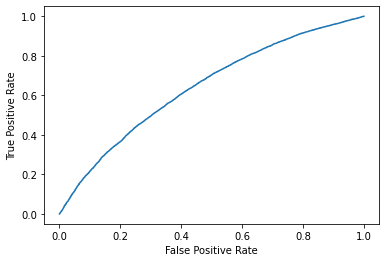

In [75]:
y_pred_proba = grad_high_lr.predict_proba(X_test_scaled)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)

#create ROC curve
plt.plot(fpr,tpr)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

# KNeighborsClassifier 
## We don't have a large dataset and it will fit into RAM, we can use the k neighbors

In [76]:
params= {'n_neighbors':[2,5,10,20,40]}
neighbors = GridSearchCV(KNeighborsClassifier(n_jobs=-1),param_grid=params)
neighbors.fit(X_train_scaled,y_train)

GridSearchCV(estimator=KNeighborsClassifier(n_jobs=-1),
             param_grid={'n_neighbors': [2, 5, 10, 20, 40]})

In [77]:
best_neighbors = neighbors.best_estimator_

print('train accuracy: ', best_neighbors.score(X_train_scaled, y_train))
print("test accuracy: ",best_neighbors.score(X_test_scaled, y_test))

train accuracy:  0.5967872366671693
test accuracy:  0.5519736842105263


In [78]:
X_train_scaled.shape

(72959, 224)

# Let's try DL
## Just simpl model, I dont really think it will predict smth =)

In [79]:
# I will take only 30 most important features
# The importance of the feature will be taken from Randomforest
importance = best_forest.feature_importances_
importance[::-1].sort()
important_column_names = []
for item in importance[:80]:
    important_column_names.append(best_forest.feature_importances_.tolist().index(item))


In [80]:
tensor_y_train = torch.FloatTensor(y_train.to_list())
tensor_y_test = torch.FloatTensor(y_test.to_list())
tensor_X_train_scaled = torch.FloatTensor(pd.DataFrame(X_train_scaled)[important_column_names].values)
tensor_X_test_scaled = torch.FloatTensor(pd.DataFrame(X_test_scaled)[important_column_names].values)

In [81]:
class ChurnNet(torch.nn.Module):
    def __init__(self, n_hidden_neurons):
        super(ChurnNet, self).__init__()
        self.fc1 = torch.nn.Linear(80,n_hidden_neurons)
        self.act1 = torch.nn.ReLU()
        self.fc2 = torch.nn.Linear(n_hidden_neurons,n_hidden_neurons//2)
        self.act2 = torch.nn.ReLU()
        self.fc3 = torch.nn.Linear(n_hidden_neurons//2,1)
        self.act3 = torch.nn.Sigmoid()
        
    def forward(self,x):
        x = self.fc1(x)
        x = self.act1(x)
        x = self.fc2(x)
        x = self.act2(x)
        x = self.fc3(x)
        x = self.act3(x)
        return x

net = ChurnNet(200) 

In [82]:
importance[:30]

array([0.17830598, 0.1584377 , 0.05848833, 0.05428032, 0.03874154,
       0.03562261, 0.03195405, 0.03006159, 0.025775  , 0.02262926,
       0.01761213, 0.01736853, 0.016675  , 0.01636158, 0.01595161,
       0.01513428, 0.0123207 , 0.01229238, 0.01186387, 0.01161178,
       0.0115903 , 0.01085417, 0.01016788, 0.00927777, 0.00871854,
       0.00841622, 0.00839135, 0.0082856 , 0.00802253, 0.00723267])

In [83]:
tensor_X_train_scaled.shape

torch.Size([72959, 80])

In [84]:
optimizer = torch.optim.Adam(net.parameters(), lr=1.0e-2)
loss = torch.nn.functional.binary_cross_entropy


In [85]:
print(tensor_X_train_scaled.shape)
print(tensor_y_train.shape)
tensor_y_train.unsqueeze_(1)
tensor_y_test.unsqueeze_(1)

torch.Size([72959, 80])
torch.Size([72959])


tensor([[1.],
        [0.],
        [0.],
        ...,
        [0.],
        [0.],
        [1.]])

In [86]:
tensor_y_train.shape

torch.Size([72959, 1])

In [87]:
batch_size = 100

for epoch in range(30):
    order = np.random.permutation(len(tensor_X_train_scaled))

    for start_index in range(0, len(tensor_X_train_scaled), batch_size):
        optimizer.zero_grad()
        net.train()
        batch_indexes = order[start_index:start_index+batch_size]

        X_batch = tensor_X_train_scaled[batch_indexes]
        y_batch = tensor_y_train[batch_indexes]

        preds = net.forward(X_batch)
        loss_value = loss(preds, y_batch)
        loss_value.backward()

        optimizer.step()
        
    test_preds = net.forward(X_batch)
    accuracy = (test_preds.argmax(dim=1) == tensor_y_test).float().mean().data

    print(accuracy)

tensor(0.5009)
tensor(0.5009)
tensor(0.5009)
tensor(0.5009)
tensor(0.5009)
tensor(0.5009)
tensor(0.5009)
tensor(0.5009)
tensor(0.5009)
tensor(0.5009)
tensor(0.5009)
tensor(0.5009)
tensor(0.5009)
tensor(0.5009)
tensor(0.5009)
tensor(0.5009)
tensor(0.5009)
tensor(0.5009)
tensor(0.5009)
tensor(0.5009)
tensor(0.5009)
tensor(0.5009)
tensor(0.5009)
tensor(0.5009)
tensor(0.5009)
tensor(0.5009)
tensor(0.5009)
tensor(0.5009)
tensor(0.5009)
tensor(0.5009)


## Yeap, It doesn't want to predict nothing

## To sum up, the best accuracy (I have already explained why I use this metric) have GradientBoostingClassifier(learning_rate=0.1, max_depth=5), with accuracy 63% on test data. 

In [88]:
print("--- %s seconds ---" % (time.time() - start_time))

--- 1645.9925751686096 seconds ---
